#My pycalphad

---



---



In [ ]:
from sympy import *
import numpy as np
import numba
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [ ]:
#r E 2-20*10**(-9)
G_r,r,G0Au,G0Ni,L0,L1,L2,Gex,Gtot1,T,L0,L1,L2,x,y = symbols("G_r,r,G0Au,G0Ni,L0,L1,L2,Gex,Gtot1,T,L0,L1,L2,x,y")
G0Au =  -6938.856+106.830098*T-22.75455*T*log(T)-.00385924*T**2+3.79625E-07*T**3-25097*T**(-1)#298<T<929
#G0Au=-93586.481 + 1021.69543* T - 155.7067449*T*log(T) + 87.56015E-3*T**2 - 11.518713E-6 + 10637210 *T**(-1)#929<T<1337
#G0Au=314067.829 - 2016.378254* T + 263.2522592*T*log(T) - 118.216828E-3*T**2 + 8.923844E-6* T**3 - 67999832* T**(-1)#1337<1735
G0Ni =  -5179.159+117.854*T-22.096*T*log(T)-.0048407*T**2#298<T<1728

G0Cu=-7770.458 + 130.485235 *T - 24.112392 *T* log(T) - 2.65684E-3*T**2 + 0.129223E-6 *T**3 + 52478* T**(-1)#298<T<1357
R = 8.31
L0 = 28696 - 11.274 * T
L1 = -10945 + 6.154* T
L2 = 2519
Gex = x *(1 - x) * (L0 - L1 * ( 2 * x - 1) + L2 * (- 2 * x + 1) **2)
G_r=2*(x*6.6*10**(-6)+(1-x)*1.07*10**(-5))*(x*(2.94-3.92*10**(-4)*T)+(1-x)*1.947-4.3*10**(-4)*T)/r
Gtot =  R * T * ( x * log (x) + ( 1 - x) * log( 1 - x)) +G0Au*x+G0Ni*(1-x)+Gex#+G_r

## Analytical solution

In [ ]:

Gtot1=diff(Gtot,x)
Gtot2=diff(Gtot1,x)

In [ ]:
expand(2*(x*6.6*10**(-6)+y*1.07*10**(-5))*(x*(2.94-3.92*10**(-4)*T)+y*1.947-4.3*10**(-4)*T)/r)
#x**2 y**2 - створити додаткову функції
#x y дописати до чистих G
#xy дописати до енергій ексесу L0
#r=10**-8

-5.1744e-9*T*x**2/r - 8.3888e-9*T*x*y/r - 5.676e-9*T*x/r - 9.202e-9*T*y/r + 3.8808e-5*x**2/r + 8.86164e-5*x*y/r + 4.16658e-5*y**2/r

In [ ]:
Gtot

8.31*T*(x*log(x) + (1 - x)*log(1 - x)) + x*(1 - x)*(-11.274*T + 2519*(1 - 2*x)**2 - (6.154*T - 10945)*(2*x - 1) + 28696) + x*(3.79625e-7*T**3 - 0.00385924*T**2 - 22.75455*T*log(T) + 106.830098*T - 6938.856 - 25097/T) + (1 - x)*(-0.0048407*T**2 - 22.096*T*log(T) + 117.854*T - 5179.159)

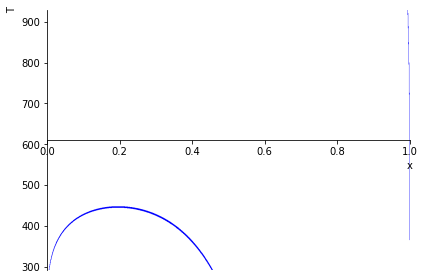

In [ ]:
p2 = plot_implicit(
    Gtot1, (x, 0, 1), (T,292,929))

In [ ]:
Gtot

8.31*T*(x*log(x) + (1 - x)*log(1 - x)) + x*(1 - x)*(-11.274*T + 2519*(1 - 2*x)**2 - (6.154*T - 10945)*(2*x - 1) + 28696) + x*(3.79625e-7*T**3 - 0.00385924*T**2 - 22.75455*T*log(T) + 106.830098*T - 6938.856 - 25097/T) + (1 - x)*(-0.0048407*T**2 - 22.096*T*log(T) + 117.854*T - 5179.159)

# Numerical solution

gibbs potential considering surface energy 

In [ ]:
@numba.njit
def Gtot(x,T,r):
  results=0
  if T<929:
    results= (8.31*T*(x*np.log(x)+(1-x)*np.log(1-x))+x*(1-x)*(-11.274*T+2519*(1-2*x)**2-(6.154*T-10945)*(2*x-1)+28696)+x*(3.79625*10**(-7)*T**3 -0.00385924*T**2-22.75455*T*np.log(T)+106.830098*T-6938.856-25097/T)+(1-x)*(-0.0048407*T**2 -22.096*T*np.log(T)+117.854*T-5179.159)+(2.14*10**(-5) -8.2*10**(-6)*x)*(-0.00043*T+x*(2.94-0.000392*T)-1.947*x+1.947)/r)
  elif (929<=T)&(T<1337):
     results=(8.31*T*(x*np.log(x)+(1-x)*np.log(1-x))+x*(1-x)*(-11.274*T+2519*(1-2*x)**2-(6.154*T-10945)*(2*x-1)+28696)+x*(0.08756015*T**2 -155.7067449*T*np.log(T)+1021.69543*T-93586.4810115187+ 10637210/T )+(1-x)*(-0.0048407*T**2 -22.096*T*np.log(T)+117.854*T-5179.159)+(2.14e-5 -8.2e-6* x)*(-0.00043*T+x*(2.94-0.000392*T)-1.947*x+1.947)/r)
  elif (1337<=T)&(T<1735):
     results=(8.31*T*(x*np.log(x)+(1-x)*np.log(1-x))+x*(1-x)*(-11.274*T+2519*(1-2*x)**2-(6.154*T-10945)*(2*x-1)+28696)+x*(8.923844e-6*T **3 -0.118216828*T**2 +263.2522592*T*np.log(T)-2016.378254*T+314067.829-67999832/T)+(1-x)*(-0.0048407*T**2 -22.096*T*np.log(T)+117.854*T-5179.159)+(2.14e-5 -8.2e-6* x)*(-0.00043*T+x*(2.94-0.000392*T)-1.947*x+1.947)/r)
  return results

In [ ]:
@numba.njit
def Gtot1(x,T,r):
  results=0
  if T<929:
    results=3.79625*10**(-7)*T**3+0.00098146*T**2+8.31*T*(np.log(x)-np.log(1-x))-0.658549999999998*T*np.log(T)-11.023902*T+x*(1-x)*(-12.308*T+20152*x+11814)-x*(-11.274*T+2519*(1-2*x)**2 -(6.154*T-10945)*(2*x-1)+28696)+(1-x)*(-11.274*T+2519*(1-2*x)**2 -(6.154*T-10945)*(2*x-1)+28696)-1759.697+(2.14*10**(-5) -8.2*10**(-6)*x)*(0.993-0.000392*T)/r - 8.2e-6* (-0.00043*T+x*(2.94-0.000392*T)-1.947*x+1.947)/r -25097/T
  elif (929<=T)&(T<1337):
    results=0.09240085*T**2 +8.31*T*(np.log(x)-np.log(1-x))-133.6107449*T*np.log(T)+903.84143*T+x*(1-x)*(-12.308*T+20152*x+11814)-x*(-11.274*T+2519*(1-2*x)**2 -(6.154*T-10945)*(2*x-1)+28696)+(1-x)*(-11.274*T+2519*(1-2*x)**2 -(6.154*T-10945)*(2*x-1)+28696)-88407.3220115187+ (2.14*10**(-5) -8.2*10**(-6) *x)*(0.993-0.000392*T)/r - 8.2*10**(-6)* (-0.00043*T+x*(2.94-0.000392*T)-1.947*x+1.947)/r +10637210/T
  elif (1337<=T)&(T<1735):
    results=8.923844*10**(-6)*T**3 -0.113376128*T**2 +8.31*T*(np.log(x)-np.log(1-x))+285.3482592*T*np.log(T)-2134.232254*T+x*(1-x)*(-12.308*T+20152*x+11814)-x*(-11.274*T+2519*(1-2*x)**2 -(6.154*T-10945)*(2*x-1)+28696)+(1-x)*(-11.274*T+2519*(1-2*x)**2 -(6.154*T-10945)*(2*x-1)+28696)+319246.988+(2.14*10**(-5)-8.2*10**(-6)* x)*(0.993-0.000392*T)/r -8.2*10**(-6)* (-0.00043*T+x*(2.94-0.000392*T)-1.947*x+1.947) - 67999832/T
  return results

find the derivative(at different angles)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


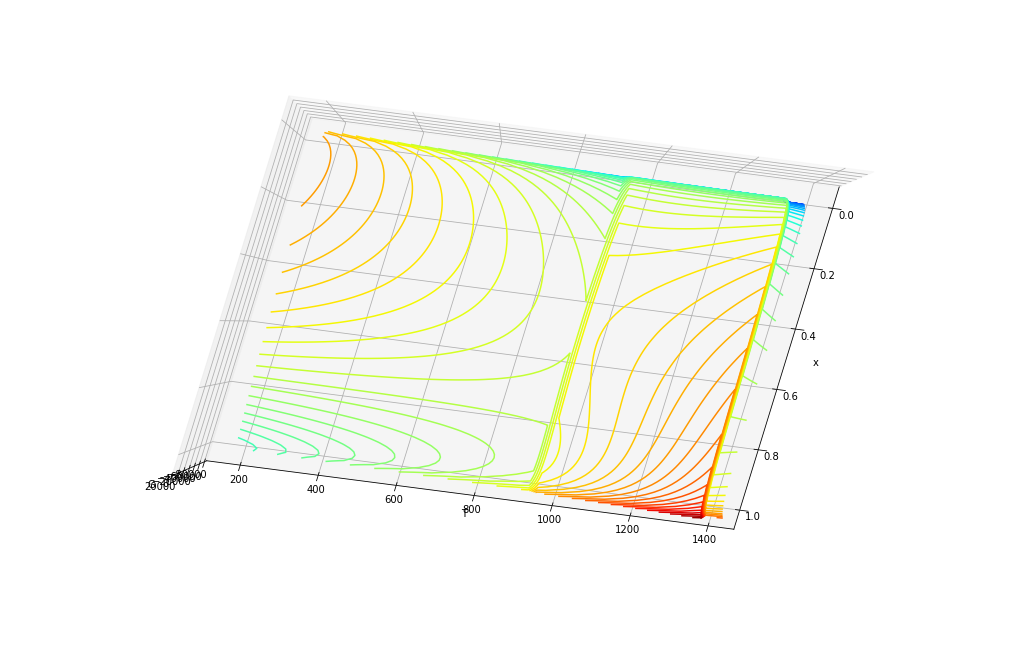

In [ ]:
x=np.arange(.001,.9999,0.01)
t=np.arange(200,1400,20)
G=np.ones((t.shape[0],x.shape[0]))
for i,_x in enumerate(x):
  for j,_T in enumerate(t):
    G[j][i]=Gtot1(_x,_T,100)
    
x,T=np.meshgrid(x,t)
fig=plt.figure(figsize=(18,12))
ax=plt.axes(projection="3d")
ax.contour3D(x,T,G,50,cmap="jet")
ax.set_xlabel("x")
ax.set_ylabel("T")
ax.set_zlabel("G")
ax.view_init(90,10)


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


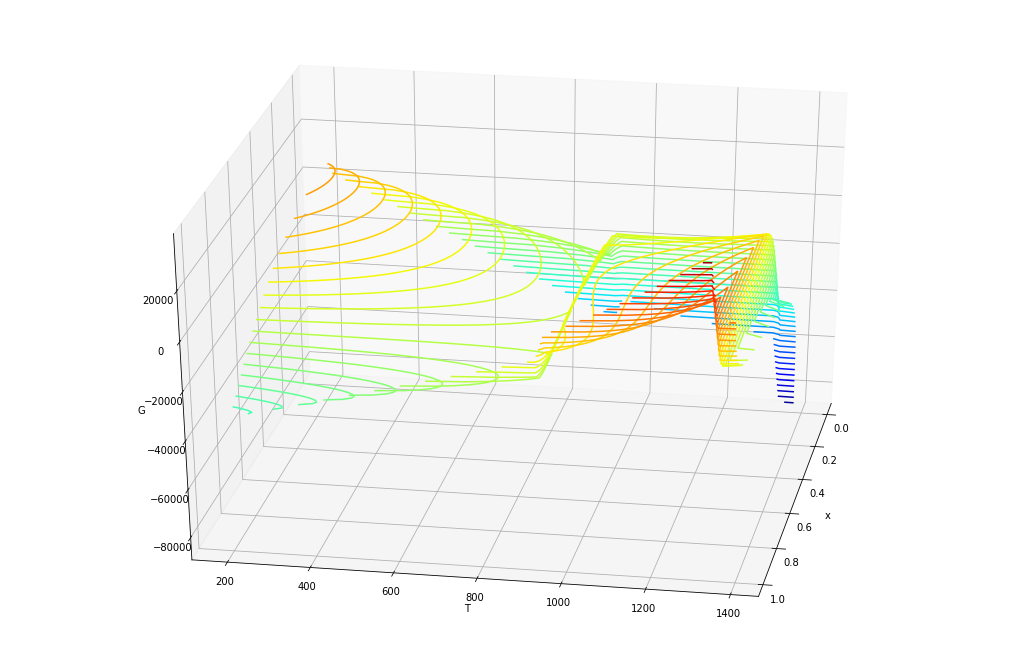

In [ ]:
x=np.arange(.001,.9999,0.01)
t=np.arange(200,1400,20)
G=np.ones((t.shape[0],x.shape[0]))
for i,_x in enumerate(x):
  for j,_T in enumerate(t):
    G[j][i]=Gtot1(_x,_T,100)
    
x,T=np.meshgrid(x,t)
fig=plt.figure(figsize=(18,12))
ax=plt.axes(projection="3d")
ax.contour3D(x,T,G,50,cmap="jet")
ax.set_xlabel("x")
ax.set_ylabel("T")
ax.set_zlabel("G")
ax.view_init(30,10)


array([[ 200,  200,  200, ...,  200,  200,  200],
       [ 220,  220,  220, ...,  220,  220,  220],
       [ 240,  240,  240, ...,  240,  240,  240],
       ...,
       [1340, 1340, 1340, ..., 1340, 1340, 1340],
       [1360, 1360, 1360, ..., 1360, 1360, 1360],
       [1380, 1380, 1380, ..., 1380, 1380, 1380]])

second derivative

In [ ]:
@numba.njit
def Gtot2(x,T,r):
  G=8.31*T*(1/(1-x)+1/x)+22.548*T+20152*x*(1-x)-2*x*(-12.308*T+20152*x+11814)-5038*(1-2*x)**2 +2*(1-x)*(-12.308*T+20152*x+11814)+2*(6.154*T-10945)*(2*x-1)-57392-(1.64*10**-5*(0.993-0.000392*T))/r
  return G

In [ ]:
# gradient descent algorithm
def gradient_descent(objective, derivative,x0,n_iter, step_size,T,r,eps=10):
  solution=x0
  # run the gradient descent
  for i in range(n_iter):
    # calculate gradient
    gradient = derivative(solution,T,r)
		# evaluate candidate point
    solution_eval = objective(solution,T,r)
    # take a step
    solution = solution - step_size * gradient
		# store solution
	#	scores.append(solution_eval)
    if (abs(derivative(solution,T,r))<eps) or ((solution>1) or (solution<0)):
      return solution 

In [ ]:
gradient_descent(objective=Gtot,
                 derivative=Gtot1,
                 x0=0.001,
                 n_iter=10000,
                 step_size=0.0000001,
                 T=1200,
                 r=10*10**(-9))

0.3470513026554978

find the transitions points in each histogram

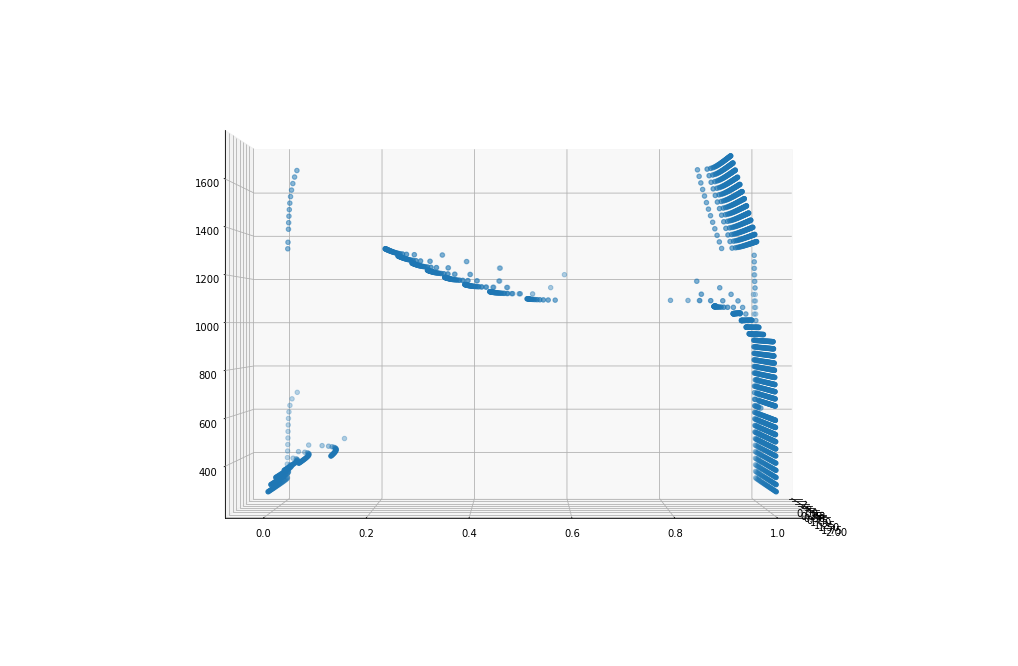

In [ ]:
T_list=np.arange(290,1720,30)
R_list=np.arange(0.1*10**(-9),20*10**(-9),1*10**(-9))
save=np.array([[0.,0.,0.]])
for Tn in T_list:
  for rn in R_list:
    save=np.append(save,np.array([[    
    gradient_descent(objective=Gtot,
                 derivative=Gtot1,
                 x0=0.001,
                 n_iter=10000,
                 step_size=0.0000001,
                 T=Tn,
                 r=rn),Tn,rn]]),axis=0)
    
    save=np.append(save,np.array([[    
    gradient_descent(objective=Gtot,
                 derivative=Gtot1,
                 x0=0.999,
                 n_iter=10000,
                 step_size=0.0000001,
                 T=Tn,
                 r=rn),Tn,rn]]),axis=0)
from matplotlib import cm

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(list(save[1:,2]),list(save[1:,0]),list(save[1:,1]),  cmap=cm.jet,)
ax.view_init(00,00)


In [ ]:
eps=10**(-3)
i=0
T_list=np.arange(400,2000,30)
R_list=np.arange(0.1*10**(-9),20*10**(-9),1*10**(-9))
save=np.array([[0.,0.,0.]])
for Tn in T_list:
  for rn in R_list:
    minimum = optimize.fminbound(Gtot, 0.5,0.999,args=(Tn,rn,),full_output=0)
    save=np.append(save,np.array([[minimum,Tn,rn]]),axis=0)    
    minimum = optimize.fminbound(Gtot, 0.001,.5,args=(Tn,rn,),full_output=0)
    save=np.append(save,np.array([[minimum,Tn,rn]]),axis=0)


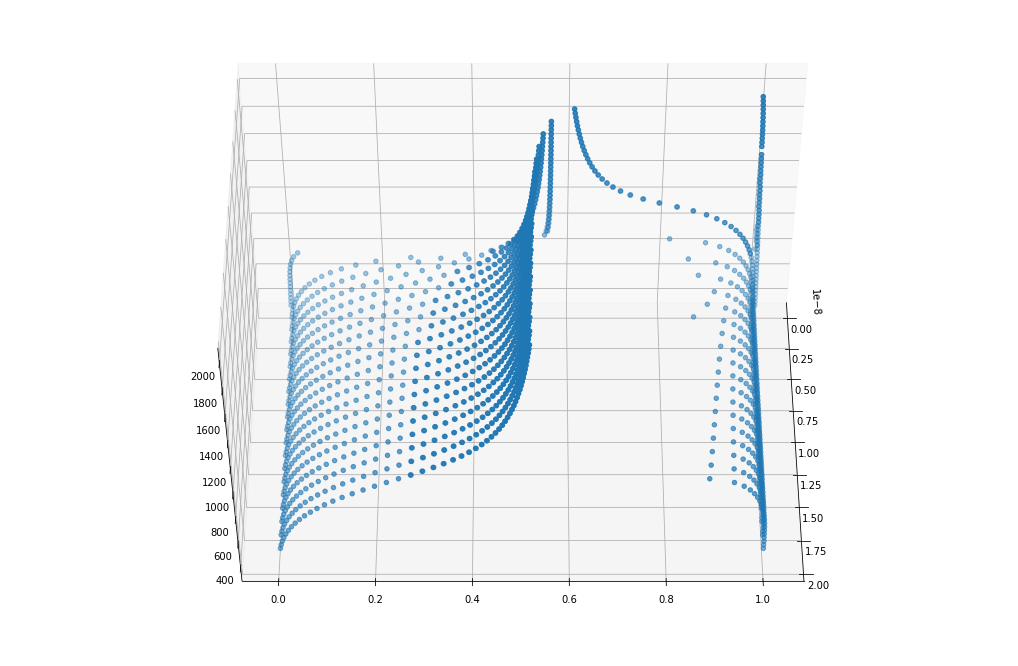